### 2021 Spring "EE479: Scientific Computing & Data"

#### Tae Hyung Kim (KAIST EE Yong-Hoon Kim Group) 
#### Kutz 3.3 Data Fitting with MATLAB


#### 2021. 05. 11 Revised from matlab version 

### Least-square fitting

# of data =  15
Error = 5.122140758331674e-07


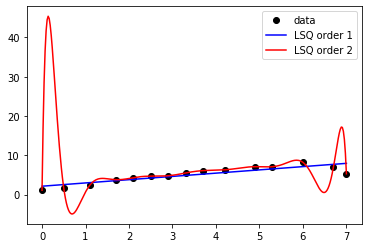

In [86]:
import numpy as np
import matplotlib.pyplot as plt

#data array
x = [0, 0.5, 1.1, 1.7, 2.1, 2.5, 2.9, 3.3, 3.7, 4.2, 4.9, 5.3, 6.0, 6.7, 7.0]
y = [1.1, 1.6, 2.4, 3.8, 4.3, 4.7, 4.8, 5.5, 6.1, 6.3, 7.1, 7.1, 8.2, 6.9, 5.3]

#number of data
print('# of data = ', len(x))

#data plot
fig,ax = plt.subplots()
plt.plot(x, y, 'o', label = 'data', color = 'k')

#fitting
xp = np.linspace(0, 7, 300)
pcoeff1 = np.polyfit(x, y, 1)       #linear fitting
yp = np.polyval(pcoeff1, xp)
plt.plot(xp, yp, label = 'LSQ order 1', color = 'b')

pcoeff2 = np.polyfit(x, y, 14)       #polynomial fitting, can increase poly order by last value
yp2 = np.polyval(pcoeff2, xp)
plt.plot(xp, yp2, label = 'LSQ order 2', color = 'r')
plt.legend(loc = 'best')

#Error
yp3 = np.polyval(pcoeff2, x)
E = np.sqrt(np.sum((np.abs(yp3-y))**2) / len(x))

print ('Error =', E)


### Interpolation

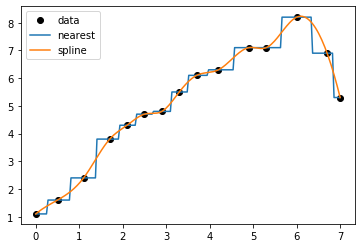

In [90]:
from scipy.interpolate import interp1d

# n-1 order polynomial fitting
n = len(x) - 1
pcoeffn = np.polyfit(x, y, n)
ypn = np.polyval(pcoeffn, xp)

#given data plot
plt.plot(x, y, 'o', label = 'data', color = 'k')

#interpolation
xp = np.linspace(0, 7, 200)
yinit = np.interp(xp, x, y)
f_near = interp1d(x, y, kind = 'nearest')          #using nearest value to interpolate
f_spline = interp1d(x, y, kind = 'cubic')          #spline interpolation
#plt.plot(xp, ypn, label = 'polynomial n-1')             
#plt.plot(xp, yinit, label = 'linear interpolation')
plt.plot(xp, f_near(xp), label = 'nearest')
#print (f_near(xp))
plt.plot(xp, f_spline(xp), label = 'spline')
plt.legend(loc = 'best')

### Nonpolynomial least-square fitting

[9.0000e+00 4.8400e+00 2.8900e+00 2.2500e+00 1.6900e+00 1.0000e+00
 4.9000e-01 1.6000e-01 6.2500e-02 2.5000e-03 4.9000e-03 2.2500e-02
 9.0000e-02 4.2250e-01 1.2100e+00 1.5625e+00 3.2400e+00 6.2500e+00]
Optimization terminated successfully.
         Current function value: 0.944828
         Iterations: 93
         Function evaluations: 177
[1.68785514 0.6002952 ]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.


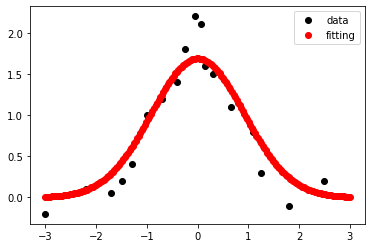

In [93]:
import scipy.optimize
x = [-3, -2.2, -1.7, -1.5, -1.3, -1, -0.7, -0.4, -0.25, -0.05, 0.07, 0.15, 0.3, 0.65, 1.1, 1.25, 1.8, 2.5]
y = [-0.2, 0.1, 0.05, 0.2, 0.4, 1.0, 1.2, 1.4, 1.8, 2.2, 2.1, 1.6, 1.5, 1.1, 0.8, 0.3, -0.1, 0.2]

x_data = np.array(x)**2
y_data = np.array(y)

print (x_data)

gauss_fit = lambda x: np.sum((x[0] * np.exp(-x[1] * x_data**2) - y_data)**2)
coeff = scipy.optimize.fmin(func=gauss_fit, x0=[-100,100])
print (coeff)

xga = np.linspace(-3, 3, 200)
a = coeff[0]; b = coeff[1]
yga = a * np.exp(-b * xga**2)

plt.plot(x, y, 'o', label = 'data', color = 'k')
plt.plot(xga, yga, 'o', label = 'fitting', color = 'r')
plt.legend(loc = 'best')